In [1]:
import os
CONDA_PREFIX = '/root/miniforge3'

def list_elements(path, *substrings):
  patterns = ".*".join(substrings)
  %env SEARCH $patterns
  %env SEARCH_DIR $path
  print("\nelements matching: [", ", ".join(substrings), "]\n")
  !find $SEARCH_DIR -name "*.spice" -exec grep -H "^\.subckt.*$SEARCH" {} \;

path = f"{CONDA_PREFIX}/share/pdk"

list_elements(path, "cap", "mim")

env: SEARCH=cap.*mim
env: SEARCH_DIR=/root/miniforge3/share/pdk

elements matching: [ cap, mim ]

/root/miniforge3/share/pdk/sky130A/libs.tech/combined/continuous/models_capacitors.spice:.subckt  sky130_fd_pr__cap_mim_m3_1 c0 c1  mult=1
/root/miniforge3/share/pdk/sky130A/libs.tech/combined/continuous/models_capacitors.spice:.subckt  sky130_fd_pr__cap_mim_m3_2 c0 c1  mult=1
/root/miniforge3/share/pdk/sky130A/libs.ref/sky130_fd_pr/spice/sky130_fd_pr__cap_mim_m3_1.model.spice:.subckt  sky130_fd_pr__cap_mim_m3_1 c0 c1 w=1 l=1 mf=1
/root/miniforge3/share/pdk/sky130A/libs.ref/sky130_fd_pr/spice/sky130_fd_pr__cap_mim_m3_2.model.spice:.subckt  sky130_fd_pr__cap_mim_m3_2 c0 c1 w=1 l=1 mf=1


.title mosfet0
.lib /root/miniforge3/share/pdk/sky130A/libs.tech/ngspice/sky130.lib.spice tt
Xcap_test DRAIN GATE sky130_fd_pr__cap_mim_m3_1
Vgnd VGND 0 0
Vdd VPWR VGND 1.8
R VPWR DRAIN 10k
VVin GATE VGND DC 0V PULSE(0V 1.8V 1ns 10ps 10ps 1ns 2ns)




Netlist warning: No print specified


done


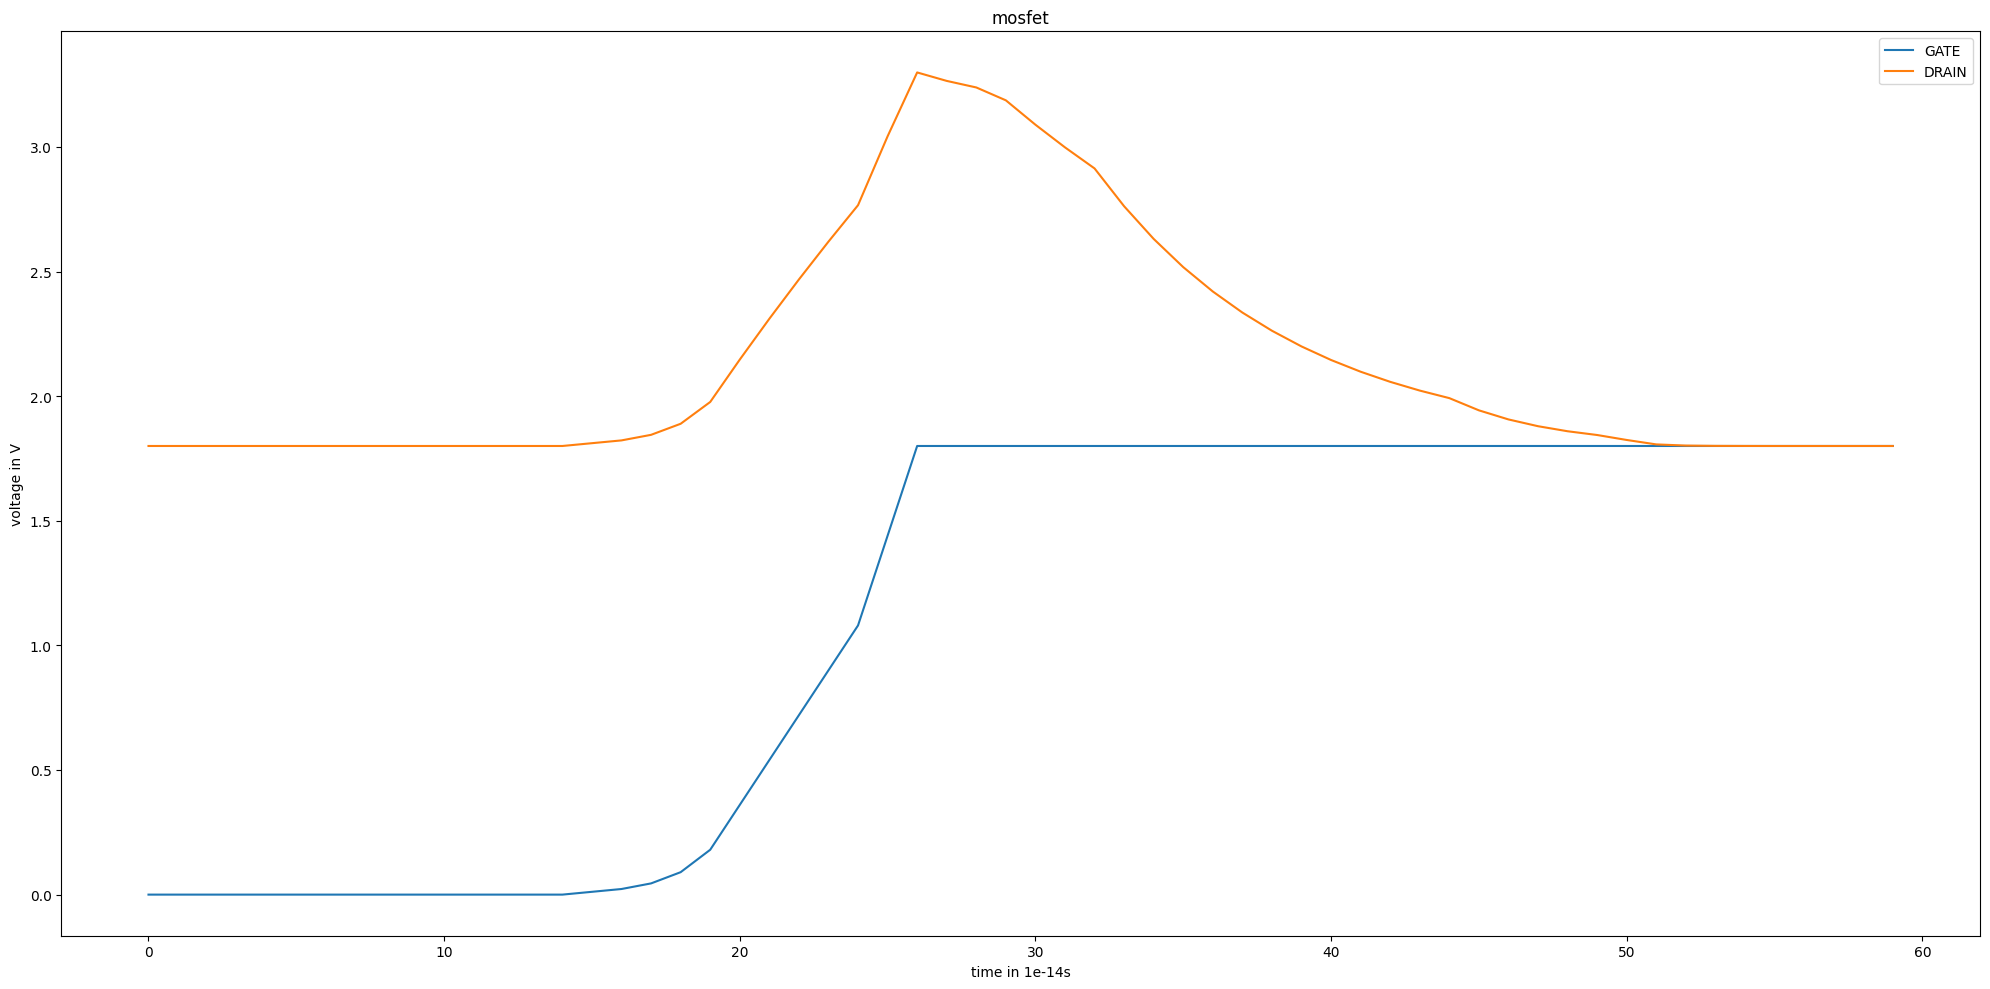

In [8]:
from PySpice.Spice.Netlist import Circuit, SubCircuit, SubCircuitFactory
from PySpice.Unit import u_V, u_ps, u_ns
import matplotlib.pyplot as plt

circuit = Circuit('mosfet0')
circuit.lib(f'{CONDA_PREFIX}/share/pdk/sky130A/libs.tech/ngspice/sky130.lib.spice', 'tt')
#circuit.include('mosfet.spice')
#circuit.X('mosfet0', 'mosfet', 'DRAIN', 'GATE', 'VGND')
circuit.X('cap_test', 'sky130_fd_pr__cap_mim_m3_1', 'DRAIN', 'GATE')
circuit.V('gnd', 'VGND', 0, 0)
circuit.V('dd', 'VPWR', 'VGND', 1.8)
circuit.R('', 'VPWR', 'DRAIN', '10k')
circuit.PulseVoltageSource('Vin', 'GATE', 'VGND',
                           initial_value=0@u_V, pulsed_value=1.8@u_V,
                           rise_time=10@u_ps, fall_time=10@u_ps,
                           pulse_width=1@u_ns, period=2@u_ns, delay_time=1@u_ns)
print(str(circuit))
simulator = circuit.simulator(simulator="xyce-parallel")
simulator._xyce_server.XYCE_COMMAND = "Xyce -hspice-ext all"
analysis = simulator.transient(step_time=10@u_ps, end_time=2@u_ns)
print('done')
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('mosfet')
ax.set_xlabel('time in 1e-14s')
ax.set_ylabel('voltage in V')
ax.plot(analysis.GATE)
ax.plot(analysis.DRAIN)
ax.legend(('GATE', 'DRAIN'))
plt.tight_layout()
plt.show()

.title 2T1C Dram
.lib /root/miniforge3/share/pdk/sky130A/libs.tech/ngspice/sky130.lib.spice ss
Xwrite_nfet MEM WWL WBL 0 sky130_fd_pr__nfet_01v8 l=0.15 w=10
Xread_nfet ROUT MEM RIN 0 sky130_fd_pr__nfet_01v8_lvt l=0.15 w=10
Xcap MEM 0 sky130_fd_pr__cap_mim_m3_2 l=10 mf=1 w=10
VVWWL WWL 0 DC 0V PULSE(0V 1.95V 1ns 0.1ns 0.1ns 3ns 1000ms)
VVWBL WBL 0 DC 0V PULSE(0V 0.8V 1.1ns 0.1ns 0.1ns 3ns 1000ms)
VVRBL RIN 0 DC 0V PULSE(0V 0.6V 5ns 0.1ns 0.1ns 1ns 2ns)
Rmeas ROUT 0 100kOhm




Netlist warning: No print specified

Netlist warning in file

Netlist warning in file

Netlist warning in file

Netlist warning in file

Netlist warning in file

Netlist warning in file

Netlist warning in file

Netlist warning in file


done


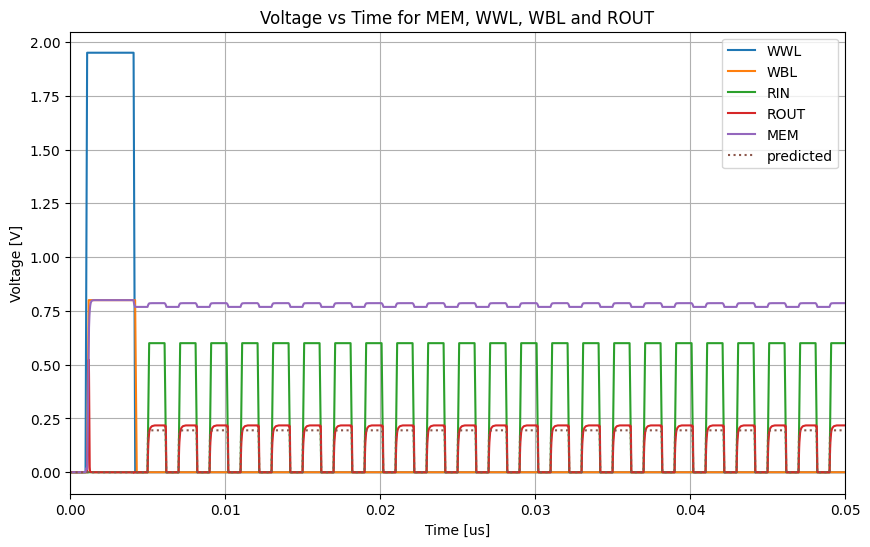

In [47]:
from PySpice.Spice.Netlist import Circuit, SubCircuit, SubCircuitFactory
from PySpice.Unit import u_V, u_mV, u_ps, u_ns, u_us, u_ms, u_Ohm, u_kOhm
import matplotlib.pyplot as plt

circuit = Circuit('2T1C Dram')
circuit.lib(f'{CONDA_PREFIX}/share/pdk/sky130A/libs.tech/ngspice/sky130.lib.spice', 'ss')
circuit.X('write_nfet', 'sky130_fd_pr__nfet_01v8', 'MEM', 'WWL', 'WBL', '0', l=0.15, w=10)
circuit.X('read_nfet', 'sky130_fd_pr__nfet_01v8_lvt', 'ROUT', 'MEM', 'RIN', '0', l=0.15, w=10)
circuit.X('cap', 'sky130_fd_pr__cap_mim_m3_2', 'MEM', '0', l=10, mf=1, w=10)
circuit.PulseVoltageSource('VWWL', 'WWL', '0', initial_value=0@u_V, pulsed_value=1.95@u_V, delay_time=1@u_ns,  fall_time=0.1@u_ns, rise_time=0.1@u_ns, pulse_width=3@u_ns, period=1000@u_ms)
circuit.PulseVoltageSource('VWBL', 'WBL', '0', initial_value=0@u_V, pulsed_value=0.8@u_V, delay_time=1.1@u_ns, fall_time=0.1@u_ns, rise_time=0.1@u_ns, pulse_width=3@u_ns, period=1000@u_ms)
circuit.PulseVoltageSource('VRBL', 'RIN', '0', initial_value=0@u_V, pulsed_value=0.6@u_V, delay_time=5@u_ns, fall_time=0.1@u_ns, rise_time=0.1@u_ns, pulse_width=1@u_ns, period=2@u_ns)
circuit.R('meas', 'ROUT', '0', 100@u_kOhm)

#circuit.X('meas', 'sky130_fd_pr__nfet_01v8_lvt', '0', 'ROUT', '0', '0', l=0.15, w=10)

print(str(circuit))
simulator = circuit.simulator(simulator="xyce-parallel")
simulator._xyce_server.XYCE_COMMAND = "Xyce -hspice-ext all"
analysis = simulator.transient(step_time=0.01@u_ns, end_time=0.05@u_us)
print('done')

import numpy as np

x = np.array(analysis["RIN"])
w = np.array(analysis["MEM"])
w = np.maximum(w-0.55,0)
x = np.minimum(w, x)
k = 7
y = k * (w*x-x**2/2)

plt.figure(figsize=(10, 6))
plt.plot(analysis.time*1e6, analysis['WWL'], label='WWL')
plt.plot(analysis.time*1e6, analysis['WBL'], label='WBL')
plt.plot(analysis.time*1e6, analysis['RIN'], label='RIN')
plt.plot(analysis.time*1e6, analysis['ROUT'], label='ROUT')
plt.plot(analysis.time*1e6, analysis['MEM'], label='MEM')
plt.plot(analysis.time*1e6, y, label='predicted', linestyle=':')

plt.xlim(0, 0.05)
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('Time [us]')
plt.ylabel('Voltage [V]')
plt.title('Voltage vs Time for MEM, WWL, WBL and ROUT')
plt.show()


In [54]:
simulator.reset_analysis = lambda *args: args
analysis = simulator.transient(step_time=0.01@u_ns, end_time=0.05@u_us)
with open("netlist.spice", "w") as f: f.write(str(analysis.simulation))
!Xyce -hspice-ext all netlist.spice


Netlist warning: No print specified

Netlist warning in file

Netlist warning in file

Netlist warning in file

Netlist warning in file

Netlist warning in file

Netlist warning in file

Netlist warning in file

Netlist warning in file



*****
***** Welcome to the Xyce(TM) Parallel Electronic Simulator
*****
***** This is version Xyce Release 7.7.0-opensource
***** Date: Fri Oct 25 19:56:27 UTC 2024


***** Executing netlist netlist.spice

***** Reading and parsing netlist...
Netlist warning: No print specified
Netlist warning in file
 /root/miniforge3/share/pdk/sky130A/libs.tech/ngspice/corners/../../../libs.ref/sky130_fd_pr/spice/sky130_fd_pr__nfet_01v8__ss.pm3.spice
 at or near line 2207
 Device model XWRITE_NFET.SKY130_FD_PR__NFET_01V8__MODEL.8: Model card
 specifies BSIM4 version 4.5 which is older than the oldest version supported
 in Xyce (4.6.1).  Using oldest version available.
 
Netlist warning in file
 /root/miniforge3/share/pdk/sky130A/libs.tech/ngspice/corners/../../../libs.ref/sky130_fd_pr/spice/sky130_fd_pr__nfet_01v8__ss.pm3.spice
 at or near line 2207
 Device model XWRITE_NFET.SKY130_FD_PR__NFET_01V8__MODEL.8: Given pbswgd is
 less than 0.1. Pbswgd is set to 0.1
Netlist warning in file
 /root/miniforg


Netlist warning: No print specified

Netlist warning in file

Netlist warning in file

Netlist warning in file

Netlist warning in file

Netlist warning: No print specified

Netlist warning in file

Netlist warning in file

Netlist warning in file

Netlist warning in file

Netlist warning: No print specified

Netlist warning in file

Netlist warning in file

Netlist warning in file

Netlist warning in file

Netlist warning: No print specified

Netlist warning in file

Netlist warning in file

Netlist warning in file

Netlist warning in file

Netlist warning: No print specified

Netlist warning in file

Netlist warning in file

Netlist warning in file

Netlist warning in file

Netlist warning: No print specified

Netlist warning in file

Netlist warning in file

Netlist warning in file

Netlist warning in file

Netlist warning: No print specified

Netlist warning in file

Netlist warning in file

Netlist warning in file

Netlist warning in file

Netlist warning: No print specified

Net

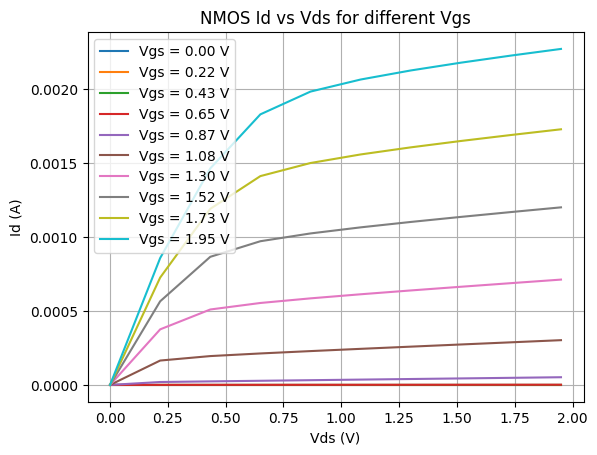

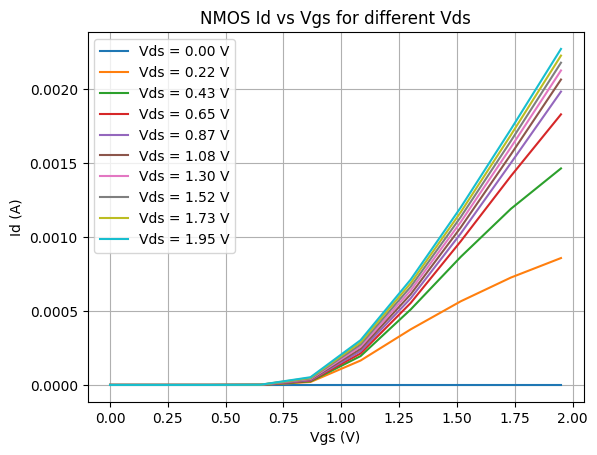

In [67]:
import matplotlib.pyplot as plt
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Probe.Plot import plot
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
import numpy as np
# Create a minimal circuit simulation of the NMOS model
circuit = Circuit('NMOS Characteristic Curves')
circuit.lib(f'{CONDA_PREFIX}/share/pdk/sky130A/libs.tech/ngspice/sky130.lib.spice', 'ss')


# Define the NMOS transistor
circuit.X(1,  'sky130_fd_pr__nfet_01v8', 'drain', 'gate', circuit.gnd, circuit.gnd, l=0.15, w=0.5,)

# Define the voltage sources
circuit.V(1, 'gate', circuit.gnd, 0@u_V)
circuit.V(2, 'drain', 'rgnd', 0@u_V)
circuit.R('rgnd', 'rgnd', circuit.gnd, 10@u_Ohm)

# Sweep Vgs and Vds
vgs_values = np.linspace(0, 1.95, 10)  # Gate-Source voltage values
vds_values = np.linspace(0, 1.95, 10)  # Drain-Source voltage values

# Store the results
results = {}

for vgs in vgs_values:
    circuit['V1'].dc_value = vgs@u_V
    id_values = {}
    for vds in vds_values:
        circuit['V2'].dc_value = vds@u_V
        simulator = circuit.simulator(simulator="xyce-parallel")
        analysis = simulator.operating_point()
        id_values[vds] = float(-analysis["rgnd"])
    results[vgs] = id_values

# Plot the results
for vgs in vgs_values:
    id_values = [results[vgs][vds] for vds in vds_values]
    plt.plot(vds_values, id_values, label=f'Vgs = {vgs:.2f} V')

plt.xlabel('Vds (V)')
plt.ylabel('Id (A)')
plt.title('NMOS Id vs Vds for different Vgs')
plt.legend()
plt.grid()
plt.show()


for vds in vds_values:
    id_values = [results[vgs][vds] for vgs in vgs_values]
    plt.plot(vgs_values, id_values, label=f'Vds = {vds:.2f} V')

plt.xlabel('Vgs (V)')
plt.ylabel('Id (A)')
plt.title('NMOS Id vs Vgs for different Vds')
plt.legend()
plt.grid()
plt.show()



Netlist warning: No print specified

Netlist warning in file /tmp/tmp_w_5rveg/input.cir at or near line 6

Netlist warning in file /tmp/tmp_w_5rveg/input.cir at or near line 6

Netlist warning in file /tmp/tmp_w_5rveg/input.cir at or near line 6

Netlist warning in file /tmp/tmp_w_5rveg/input.cir at or near line 6

Netlist warning in file /tmp/tmp_w_5rveg/input.cir at or near line 6

Netlist warning in file /tmp/tmp_w_5rveg/input.cir at or near line 2

Netlist warning: No print specified

Netlist warning in file /tmp/tmpidyrx53d/input.cir at or near line 6

Netlist warning in file /tmp/tmpidyrx53d/input.cir at or near line 6

Netlist warning in file /tmp/tmpidyrx53d/input.cir at or near line 6

Netlist warning in file /tmp/tmpidyrx53d/input.cir at or near line 6

Netlist warning in file /tmp/tmpidyrx53d/input.cir at or near line 6

Netlist warning in file /tmp/tmpidyrx53d/input.cir at or near line 2

Netlist warning: No print specified

Netlist warning in file /tmp/tmpeadqg67z/input.c

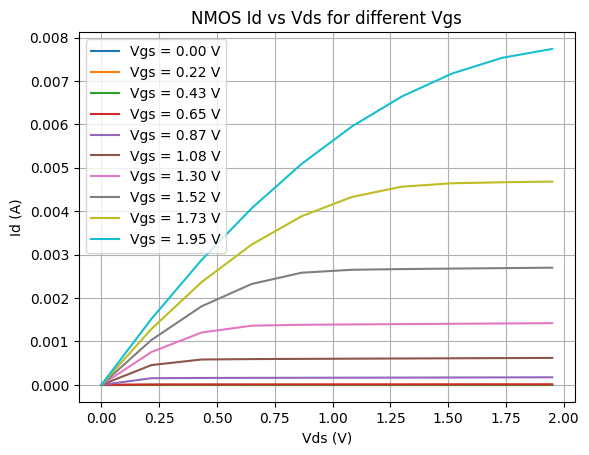

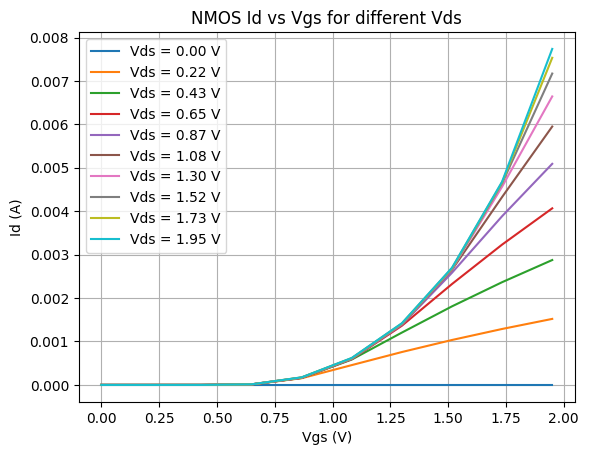

In [68]:
import matplotlib.pyplot as plt
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Probe.Plot import plot
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
import numpy as np
# Create a minimal circuit simulation of the NMOS model
circuit = Circuit('NMOS Characteristic Curves')
circuit.model(
            'NMOS', 'NMOS', LEVEL=54, VTO=0.7, TOX=4.148e-9, XJ=1.5e-7, NDEP=1.7e17,
            NSUB=1.0e20, RSH=0.1, U0=0.030197, VSAT=176320, K1=0.90707349, K2=-0.12949, K3=2.0, DVT0=0.0,
            DVT1=0.53, DVT2=-0.032, ETA0=0.00069413878, NFACTOR=2.015, VOFF=-0.20753, RDSW=65.968, PRWG=0.021507,
            PRWB=0.0, WINT=2.1859e-8, LINT=1.1932e-8, CGSO=2.54e-10, CGDO=2.54e-10, CGBO=1.0e-13, KETA=0.0, A0=1.5,
            AGS=1.25, B0=0.0, B1=0.0, A1=0.0, A2=0.42385546, PCLM=0.14094, PDIBLC1=0.35697215,
            PDIBLC2=0.0084061121, PDIBLCB=-0.10329577, DR0UT=0.50332666, PSCBE1=7.9141988e+8, PSCBE2=1.0e-12,
            PVAG=0.0, DELTA=0.01, ALPHA0=3.0e-8, ALPHA1=0.85, BETA0=13.85
        )

# Define the NMOS transistor
circuit.M(1, 'drain', 'gate', circuit.gnd, circuit.gnd, model='NMOS',  l=0.15, w=0.5)

# Define the voltage sources
circuit.V(1, 'gate', circuit.gnd, 0@u_V)
circuit.V(2, 'drain', 'rgnd', 0@u_V)
circuit.R('rgnd', 'rgnd', circuit.gnd, 10@u_Ohm)

# Sweep Vgs and Vds
vgs_values = np.linspace(0, 1.95, 10)  # Gate-Source voltage values
vds_values = np.linspace(0, 1.95, 10)  # Drain-Source voltage values

# Store the results
results = {}

for vgs in vgs_values:
    circuit['V1'].dc_value = vgs@u_V
    id_values = {}
    for vds in vds_values:
        circuit['V2'].dc_value = vds@u_V
        simulator = circuit.simulator(temperature=25, nominal_temperature=25, simulator="xyce-serial")
        analysis = simulator.operating_point()
        id_values[vds] = float(-analysis["rgnd"])
    results[vgs] = id_values

# Plot the results
for vgs in vgs_values:
    id_values = [results[vgs][vds] for vds in vds_values]
    plt.plot(vds_values, id_values, label=f'Vgs = {vgs:.2f} V')

plt.xlabel('Vds (V)')
plt.ylabel('Id (A)')
plt.title('NMOS Id vs Vds for different Vgs')
plt.legend()
plt.grid()
plt.show()


for vds in vds_values:
    id_values = [results[vgs][vds] for vgs in vgs_values]
    plt.plot(vgs_values, id_values, label=f'Vds = {vds:.2f} V')

plt.xlabel('Vgs (V)')
plt.ylabel('Id (A)')
plt.title('NMOS Id vs Vgs for different Vds')
plt.legend()
plt.grid()
plt.show()
